# Lab #1. Numpy, Pandas and Matplotlib

### Important: do not delete any blocks
#### But you may add as many as you need.

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Make sure to install these modules before you start.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.



#### Evaluation

- Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 
- There are **Questions** in the tasks, don't skip them. If you skip a question, value of the task becomes 0. 
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2022_lab01_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab01_404_Sheipak_Sviat.ipynb`
    - `2022_lab01_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab01_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-09-29 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/FnMXcdDjbWTxTw

## Part 1. Numpy and plots [2.5 points]

`numpy` is a module that helps you to deal with vectors (matrices and tensors too) and it has a lot of cool features.

Firstly, let's import it:

In [82]:
import numpy as np

Vectors in numpy are called **arrays**. Create an array from a list:

In [83]:
my_list = [1, 2, 3, 4, 5, 6]
my_vector = np.array(my_list)
print(my_list)
print(my_vector)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


You can reshape them:

In [84]:
my_vector = my_vector.reshape((2, 3))
print(my_vector.shape)
print(my_vector)

my_vector = my_vector.reshape((6, 1))
print(my_vector.shape)
print(my_vector)

(2, 3)
[[1 2 3]
 [4 5 6]]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


You don't even have to state all of dimensions explicitly, since they can be derived (use -1):

In [85]:
my_vector = my_vector.reshape((3, -1))
print(my_vector.shape)
print(my_vector)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Slices!

In [86]:
print(my_vector[0, 1])
print(my_vector[:, 1])
print(my_vector[:2])
print(my_vector[:2,::-1])

2
[2 4 6]
[[1 2]
 [3 4]]
[[2 1]
 [4 3]]


Arithmetic operations:

In [87]:
vector_a = np.arange(10)
print(vector_a)
print(vector_a - 10)
print(vector_a * 100)
print(np.array([5, 4]) + np.array([1, 6]))
print(np.array([5, 4]) * np.array([1, 6]))

[0 1 2 3 4 5 6 7 8 9]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[  0 100 200 300 400 500 600 700 800 900]
[ 6 10]
[ 5 24]


**Task 1. Basic arrays [0.5 point]** 

Create a 2-dimensional numpy array `x` of 100 by 2 shape filled with random numbers from $U[0, 1]$

In [88]:
x = np.random.uniform(0, 1, size=(100, 2))
assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

0.4595281653817018

Calculate averages: row-wise, column-wise and total. Use `np.mean` and `axis` parameter. Then `print` the `mean_total` rounded to 3 digits after comma (using `format` method).

In [89]:
mean_by_row = np.mean(x, axis=1)
mean_by_col = np.mean(x, axis=0)
mean_total = np.mean(x)

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {}".format(np.round_(mean_total, 3)))

The total mean is 0.46


**Task 2. Sort 2-dim array [0.5 point]** 

Create a 1-dimensional numpy array `y` of 100 random **integers** from $U\{0, 1, 2, 3\}$

In [90]:
y = np.random.randint(4, size=100)
assert y.shape == (100,)

Import class `Counter` from `collections` module.

In [91]:
from collections import Counter

In [92]:
basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)

In [93]:
print(container_A, container_B, container_C)

{3: 25, 0: 26, 2: 24, 1: 25} [(3, 25), (0, 26), (2, 24), (1, 25)] [[ 3 25]
 [ 0 26]
 [ 2 24]
 [ 1 25]]


Here are three data structures.

**Question:** What is the type of `container_A`? What is the type of `container_B`? What is the type of the elements of `container_C`?

**Your answer:**

In [94]:
type(container_A), type(container_B), container_C.dtype

(dict, list, dtype('int64'))

Use `np.sort` to order elements of `container_C` acsending by their first coordinate (pay attention to `axis` parameter).

In [95]:
counter_values = container_C[container_C[:, 0].argsort()]

assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


**Task 3. Basic barplot [0.5 points]** 

Plot a barplot representing how many times each value `0, 1, 2, 3` is encounterd in `y`. Do not forget to:
- Add title to the plot
- Label the axes
- Specify x-ticks 

You may use `counter_values` you have obtained in a Task 2.

In [96]:
import matplotlib.pyplot as plt

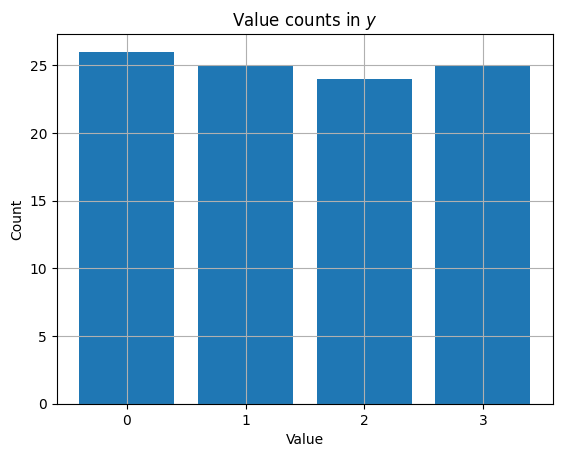

In [97]:
plt.title("Value counts in $y$")
plt.bar(counter_values[:, 0], counter_values[:, 1])
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

**Task 4. Concat two numpy arrays [0.5 point]**

You have:
- `x`: 100 $\times$ 2
- `y`: 100

Concatenate them horizontally to get `z`: 100 $\times$ 3

In [98]:
z = np.concatenate([x, np.expand_dims(y, axis=1)], axis=1)

assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()

**Task 5. Basic Scatter Plot [0.5 point]**

You have:
- `z`: 100 $\times$ 3

Each row of `z` consists of 3 numbers. Build a scatter plot where each row is represented by a dot: first and second number are coordinates and third number corresponds to dot colour. Don't forget to add a legend.

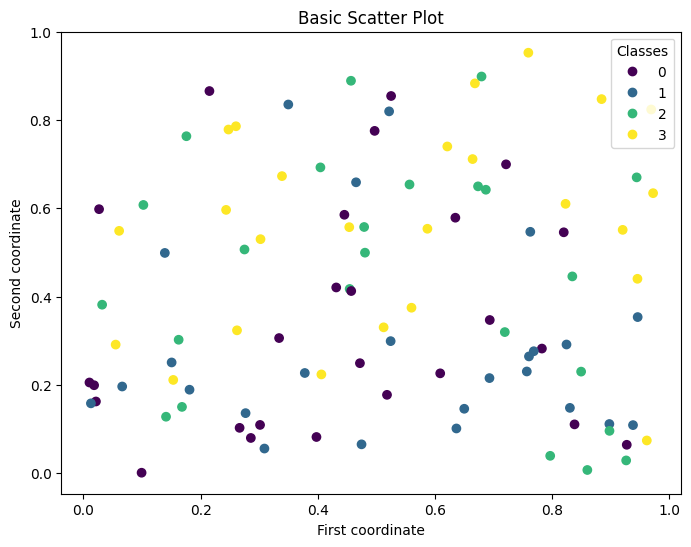

In [99]:
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")

colormap = np.array(z[:, 2], dtype='int8')
sc = plt.scatter(z[:, 0], z[:, 1], c=colormap)
plt.legend(*sc.legend_elements(), loc="upper right", title="Classes")
plt.xlabel('First coordinate')
plt.ylabel('Second coordinate')
plt.show()

# Part 2. Moscow houses [4.5 points]

In this part we start to work with datasets and `pandas` module.
You will need to download `moscow_coords.csv` file. It provides a coordinate and an address for some houses in Moscow. The original source of the data: https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=445

In [100]:
import pandas as pd

In [101]:
coords_db = pd.read_csv("data/moscow_coords.csv")

In [102]:
coords_db.head(10)

,ADDRESS,coor_x,coor_y
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510
5,"город Москва, улица Вострухина, дом 5А",37.797659,55.720022
6,"город Москва, улица Космонавта Волкова, дом 10...",37.514713,55.815373
7,"город Москва, Балтийская улица, дом 8, строени...",37.517288,55.809580
8,"город Москва, улица Головачёва, дом 3, корпус 2",37.805437,55.675219
9,"город Москва, Климентовский переулок, дом 1, с...",37.631972,55.740967


In [103]:
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))

<class 'pandas.core.frame.DataFrame'>
(406934, 3)
Index(['ADDRESS', 'coor_x', 'coor_y'], dtype='object')
<class 'pandas.core.series.Series'>


**Task 1. Address analysis [0.5 point]**

As we can see, the dataset has 3 columns: `ADDRESS`, `coor_x` and `coor_y`.
Let's focus on `ADDRESS` - the datatype of this column is `str`.

Your task is to find and describe addresses that inlcude word `город`* at least two times.

**город* - *city* in russian

Let's do it step by step:
1. Implement a function `tokenize_address`, that takes a string

* casts string to lowercase;
    
* removes all `,` and `.` symbols;
    
* splits string into a `list` of strings; separation symbol is a whitespace ` `.
    
2. Implement a function `count_a_token`, that takes a list of strings and counts number of entries of a particular token.

In [104]:
def tokenize_address(input_string):
    """
    input:
    - input_string: str
    output:
    - list<str> - string split into tokens
    """
    output_string = input_string.lower().replace(',', '').replace('.', '').split()
    return output_string

assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

In [105]:
def count_a_token(token_list, lookup_token):
    """
    input:
    - token_list: list<str>
    - lookup_token: str
    output:
    - int - how many times lookup_token is encountered in token_list
    """
    return token_list.count(lookup_token)

In [106]:
test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")

['город', 'москва', 'улица', 'космонавта', 'волкова', 'дом', '10']
1
Seems fine!


Now it is time add new column `city_token_cnt` to the dataset. Values in this column should be a result of applying two functions above to a `coords_db["ADDRESS"]`. Note that `coords_db["ADDRESS"]` is a `pandas.Series` object and it has method `apply`.

In [107]:
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))

In [108]:
coords_db.head()

,ADDRESS,coor_x,coor_y,city_token_cnt
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,1
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,1
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,1
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,1
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,1


And the final step: let's do a `groupby` by column `city_token_cnt` to find out how many addresses have token `город` two times or more.

In [109]:
stats = coords_db.groupby(['city_token_cnt']).count()['ADDRESS']

In [110]:
stats

city_token_cnt
0      1790
1    394061
2     11083
Name: ADDRESS, dtype: int64

**Question**: how many addresses have token `город` two times or more?

**Your answer**: 11083

**Task 2. Count 2-grams [1 point]**

For a sequence of tokens `["a_1", "a_2", ..., "a_N"]` **n-gram** is a subsequence of **n** consecutive tokens.

For example: given a sequence of tokens `["a", "b", "c", "d"]` it has:
- Four unigrams: `["a"], ["b"], ["c"], ["d"]`
- Three 2-grams: `["a", "b"], ["b", "c"], ["c", "d"]`
- Two 3-grams: `["a", "b", "c"], ["b", "c", "d"]`
- One 4-gram: `["a", "b", "c", "d"]`

Your task is two find all 2-grams that start with `город` token and count their occurences in all addresses.

Firstly, implement a function `get_n_grams`:

In [111]:
def get_n_grams(input_tokens, n):
    """
    input:
    - input_tokens: list<str>
    - n: int, size of n-grams
    output:
    - list<list<str>> - list of n-grams
    """
    m = len(input_tokens)
    return [[input_tokens[i] for i in range(j, n+j)] for j in range(m-n+1)]

In [112]:
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

OK, seems fine!


Secondly, define a function that will filter list of n-grams by the first element of an n-gram:

In [113]:
def filter_n_grams(n_grams, lookup_token):
    """
    input:
    - n_grams: list<list<str>>
    - lookup_token: str
    output:
    - list<list<str>> - sublist of n-grams first token of which is equal to lookup_token
    """
    return [sublist for sublist in n_grams if sublist[0] == lookup_token]

In [114]:
assert filter_n_grams([
    ["a", "b"],
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ],
    "a") == [["a", "b"], ["a", "c"]]

print("Seems fine!")

Seems fine!


Back to our dataset. Leave rows with `city_token_cnt >= 2`

In [115]:
sub_db = coords_db[coords_db['city_token_cnt'] >= 2]
print(sub_db.shape)
sub_db.head(5)

(11083, 4)


,ADDRESS,coor_x,coor_y,city_token_cnt
40,"город Москва, город Зеленоград, корпус 1212",37.193861,55.992106,2
193,"город Москва, город Зеленоград, корпус 1459",37.162394,55.984514,2
220,"город Москва, город Зеленоград, корпус 1215",37.190049,55.994432,2
282,"город Москва, город Зеленоград, корпус 1110",37.188728,55.999289,2
363,"город Москва, город Зеленоград, корпус 115",37.204655,56.008116,2


Let's build a dict that contains counts of 2-grams: 
```
{
    "город x": cnt_x,
    "город y": cnt_y,
     ...
    "город N": cnt_N
      
}
```
Note that key is a string `"город x"`, not a list `["город", "x"]` - list cannot be a key in a dict.

In [116]:
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = tokenize_address(address)
    n_grams = get_n_grams(tokens, 2)
    filtered_n_grams = filter_n_grams(n_grams, 'город')
    for x in filtered_n_grams:
        key = ' '.join(map(str, x))
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1

In [117]:
counter_dict

{'город москва': 11083,
 'город зеленоград': 3579,
 'город московский': 1351,
 'город троицк': 4193,
 'город щербинка': 1959,
 'город зеленогра': 1}

**Task 3. Garden Ring houses scatterplot [1 points]**

We need to find houses that are located near the Garden Ring. There can be a lot of definitions of *near* - but in our case *near* means inside a polygon. Inner and outer polygon points can be found in files: `inner_poly.csv` and `outer_poly.csv` respectively.

In [118]:
inner_poly = pd.read_csv("data/inner_poly.csv", header=None).values
outer_poly = pd.read_csv("data/outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

Let's scatter plot the points:

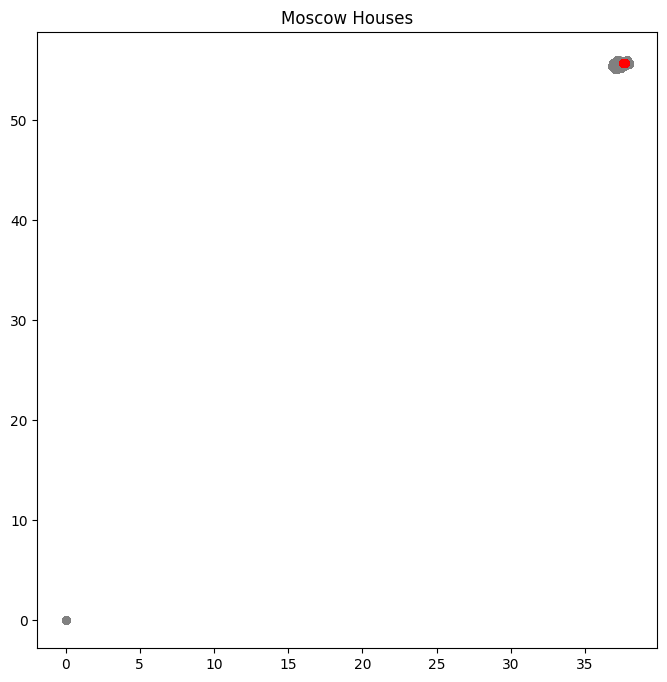

In [119]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Ooooops seems a bit wrong. 

**Question**: why does the plot look so strange? How to fix it?

**Your answer:** Because, there are some outliers in house_points data

Now fix the `house_points` array, remove a set of points in the bottom left corner:

In [120]:
indexes = np.where(house_points[:, 0] > 10)
house_points = house_points[indexes[0]]

And scatter it again:

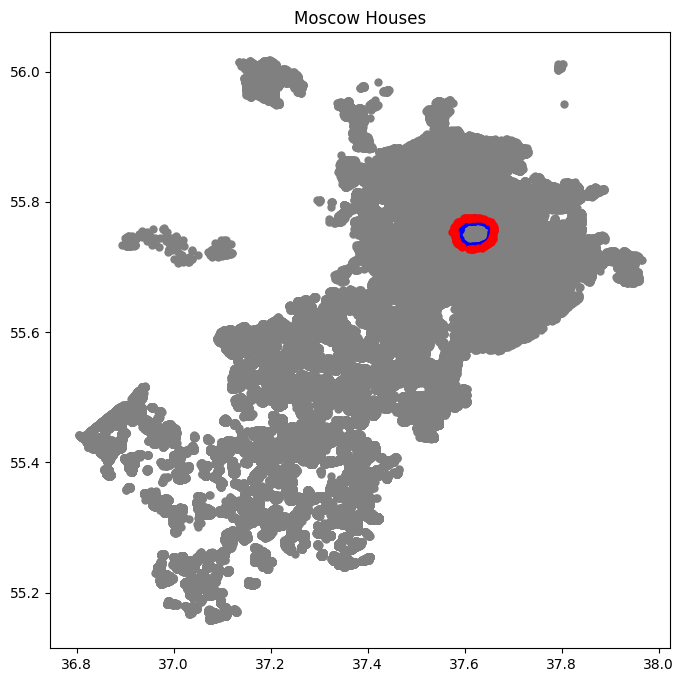

In [121]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Let's do a little zoom-in: filter `house_points` and leave points in some **small square** near the garden ring. The choice of the size of the square is up to you, but the outer poly should be inside this square.

I have already defined a small square, but you can change its sizes.

In [122]:
lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    return input_array[np.where(
        np.logical_and(
            np.logical_and(input_array[:, 0] >= lower_x, input_array[:, 0] <= upper_x),
            np.logical_and(input_array[:, 1] >= lower_y, input_array[:, 1] <= upper_y)
        ))]

In [123]:
small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)

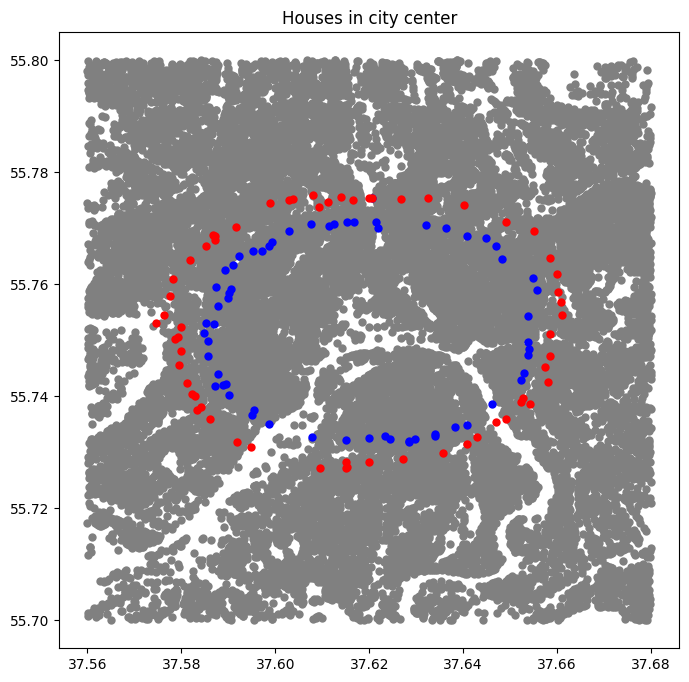

In [124]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

**Task 4. Houses in a polygon [2 points]**

Implement a function, that by two coordinates of a point and list of coordinates of the polygon tells whether this point is inside a polygon or not.

You may define as many others functions as you want.

*Hint: the polygons may be regarded as convex.*

**Question:** what algorithm to decide whether the point is inside will you implement? Why is it supposed to work?

**Your answer:** Ray tracing

In [125]:
def point_is_inside(point, polygon_points):
    """
    input:
    - point np.array of (1, 2) shape
    - polygon_points np.array of (N, 2) shape
    output:
    - bool True if point is inside, false if point is outside
    """
    result = False
    j = len(polygon_points) - 1
    for i in range(len(polygon_points)):
        if (polygon_points[i, 1] < point[1] and polygon_points[j, 1] >= point[1] or polygon_points[j, 1] < point[1] and polygon_points[i, 1] >= point[1]) and (polygon_points[i, 0] + (point[1] - polygon_points[i, 1]) / (polygon_points[j, 1] - polygon_points[i, 1]) * (polygon_points[j, 0] - polygon_points[i, 0]) < point[0]):
            result = not result
        j = i
    return result

In [126]:
point = np.array([0, 0])
polygon_points = np.array([[-1, 0], [0, -1], [0, 1], [1, 0]])
print(point_is_inside(point, polygon_points))

True


And the final part! 

Scatter plot `small_square_points` again, but with 3 different colours:
- colour 1: points inside inner poly
- colour 2: points outside outer poly
- colour 3: points between inner and outer polys

In [127]:
mask_inner = [point_is_inside(small_square_points[i], inner_poly) for i in range(len(small_square_points))]
mask_outer = [point_is_inside(small_square_points[i], outer_poly) for i in range(len(small_square_points))]

inner_indexes = np.where(np.array(mask_inner))[0]
outer_indexes = np.where(~np.array(mask_outer))[0]
between_indexes = np.where(np.logical_and(np.array(mask_outer), ~np.array(mask_inner)))[0]

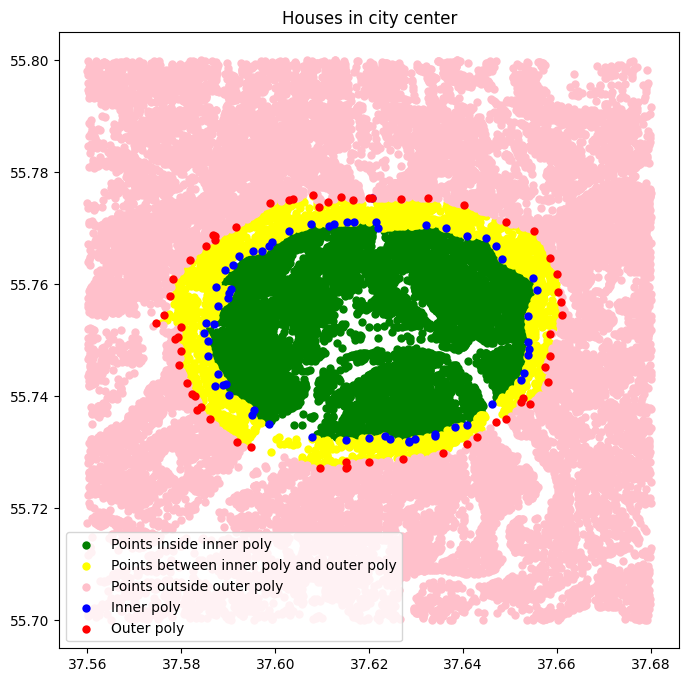

In [128]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[inner_indexes, 0], small_square_points[inner_indexes, 1], linewidths=0.001, c="green")
plt.scatter(small_square_points[between_indexes, 0], small_square_points[between_indexes, 1], linewidths=0.001, c="yellow")
plt.scatter(small_square_points[outer_indexes, 0], small_square_points[outer_indexes, 1], linewidths=0.001, c="pink")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.legend(['Points inside inner poly', 'Points between inner poly and outer poly', 'Points outside outer poly', 'Inner poly', 'Outer poly'])
plt.show()

**Question:** How many points are there between inner and outer polys?

In [129]:
inner_indexes.shape, outer_indexes.shape, between_indexes.shape

((7714,), (16125,), (2952,))

**Your answer:** 2952

# Part 3. Titanic Dataset - Stats and Plots [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice peculiarities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [131]:
passengers_record = pd.read_csv('./data/passengers_record.csv')
survival_info = pd.read_csv('./data/survival_info.csv')

assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"

In [132]:
passengers_record.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
survival_info.head(5)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [134]:
passengers_record.shape, survival_info.shape

((891, 11), (891, 2))

In [135]:
db = pd.merge(passengers_record, survival_info, on='PassengerId', how='right')
db

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


**Age distribution**

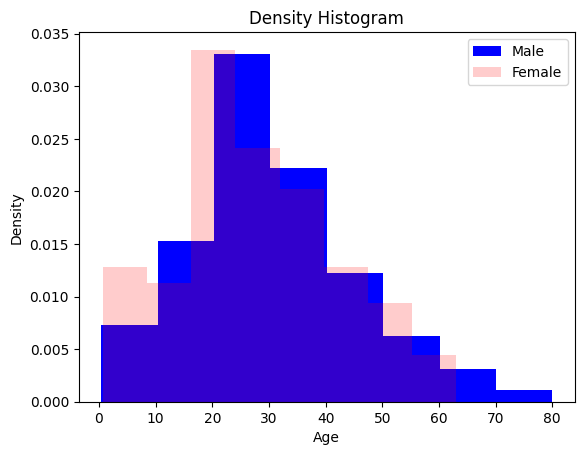

In [136]:
n_bins_age = int(max(db['Age'].values)//10)

plt.hist(db["Age"][db['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
plt.hist(db["Age"][db['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
plt.gca().set(title='Density Histogram', ylabel='Density', xlabel='Age')
plt.legend()

Most passengers are under 40
Men are on average older

**Gender distribution**

In [137]:
db.groupby('Sex').agg({'PassengerId': ['count']})

,PassengerId
,count
Sex,
female,314
male,577


Most of the passengers are men

**Classes distribution**

In [138]:
db.groupby('Pclass').agg({'PassengerId': ['count']})

,PassengerId
,count
Pclass,
1,216
2,184
3,491


Most of the passengers are in second or third class

**Averages**

In [139]:
print(f'Mean age: {db["Age"].mean()}, Sex mode: {db["Sex"].mode()[0]}, Class mode: {db["Pclass"].mode()[0]}')

Mean age: 29.69911764705882, Sex mode: male, Class mode: 3


**Youngest passengers in every class**

In [140]:
idx = db.groupby('Pclass')['Age'].idxmin()
db.loc[idx]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1
755,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,1
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1


**Oldest passengers in every class**

In [141]:
idx = db.groupby('Pclass')['Age'].idxmax()
db.loc[idx]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S,1
672,673,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.500,NaN,S,0
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S,0


**Comparing survival rates between classes/age groups/genders**

In [142]:
db[db['Survived']==1].groupby('Pclass').agg({'Survived': ['count']})

,Survived
,count
Pclass,
1,136
2,87
3,119


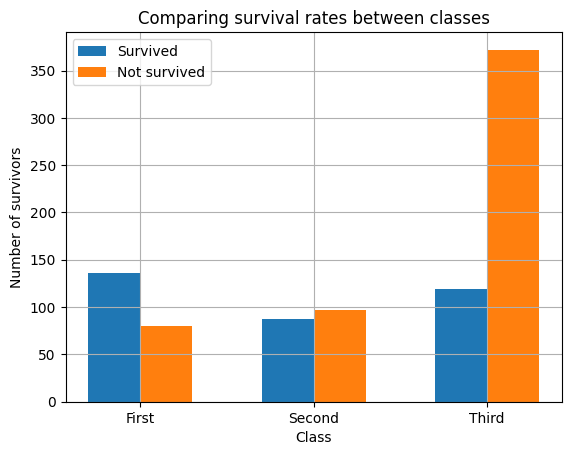

In [143]:
temp_survived = db[db['Survived']==1].groupby('Pclass').agg({'Survived': ['count']})
temp_not_survived = db[db['Survived']==0].groupby('Pclass').agg({'Survived': ['count']})

height_survived = temp_survived.to_numpy().T
height_not_survived = temp_not_survived.to_numpy().T
ind = np.arange(3)
width = 0.3

plt.bar(ind, *height_survived, width, label='Survived')
plt.bar(ind+width, *height_not_survived, width, label='Not survived')

plt.xlabel('Class')
plt.ylabel('Number of survivors')
plt.title('Comparing survival rates between classes')
plt.xticks(ind + width / 2, ('First', 'Second', 'Third'))

plt.legend(loc='best')
plt.grid()
plt.show()

First class passengers have a better chance of survival than others

In [144]:
db[db['Survived']==1].groupby('Sex').agg({'Survived': ['count']})

,Survived
,count
Sex,
female,233
male,109


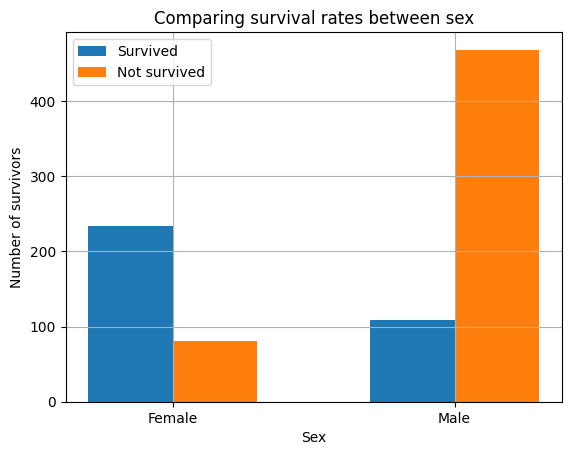

In [145]:
temp_survived = db[db['Survived']==1].groupby('Sex').agg({'Survived': ['count']})
temp_not_survived = db[db['Survived']==0].groupby('Sex').agg({'Survived': ['count']})

height_survived = temp_survived.to_numpy().T
height_not_survived = temp_not_survived.to_numpy().T
ind = np.arange(2)
width = 0.3

plt.bar(ind, *height_survived, width, label='Survived')
plt.bar(ind+width, *height_not_survived, width, label='Not survived')

plt.xlabel('Sex')
plt.ylabel('Number of survivors')
plt.title('Comparing survival rates between sex')
plt.xticks(ind + width / 2, ('Female', 'Male'))

plt.legend(loc='best')
plt.grid()
plt.show()

Most of the survivors are women

In [146]:
temp_db = db.copy()
temp_db['Age group'] = pd.cut(temp_db["Age"], 10)
temp_db

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,"(16.336, 24.294]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(32.252, 40.21]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(24.294, 32.252]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(32.252, 40.21]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(32.252, 40.21]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,"(24.294, 32.252]"
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,"(16.336, 24.294]"
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(24.294, 32.252]"


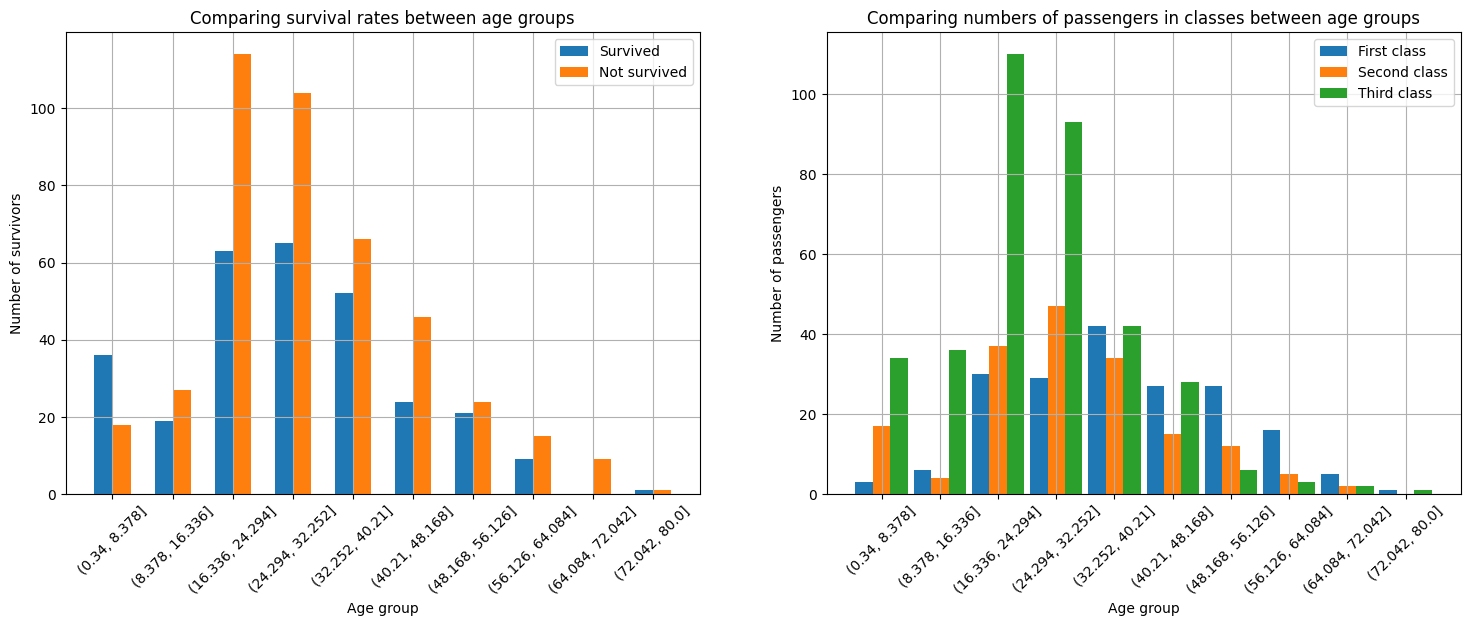

In [147]:
temp_survived = temp_db[temp_db['Survived']==1].groupby('Age group').agg({'Survived':['count']})
temp_not_survived = temp_db[temp_db['Survived']==0].groupby('Age group').agg({'Survived':['count']})

temp_classes_3 = temp_db[temp_db['Pclass']==3].groupby('Age group').agg({'Name':['count']})
temp_classes_2 = temp_db[temp_db['Pclass']==2].groupby('Age group').agg({'Name':['count']})
temp_classes_1 = temp_db[temp_db['Pclass']==1].groupby('Age group').agg({'Name':['count']})

height_survived = temp_survived.to_numpy().T
height_not_survived = temp_not_survived.to_numpy().T

height_classes_3 = temp_classes_3.to_numpy().T
height_classes_2 = temp_classes_2.to_numpy().T
height_classes_1 = temp_classes_1.to_numpy().T

ind = np.arange(10)
width = 0.3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.bar(ind, *height_survived, width, label='Survived')
ax1.bar(ind+width, *height_not_survived, width, label='Not survived')

ax2.bar(ind, *height_classes_1, width, label='First class')
ax2.bar(ind+width, *height_classes_2, width, label='Second class')
ax2.bar(ind+2*width, *height_classes_3, width, label='Third class')

ax1.set_xlabel('Age group')
ax1.set_ylabel('Number of survivors')
ax1.set_title('Comparing survival rates between age groups')
ax1.set_xticks(ind + width / 2, temp_survived.index, rotation=45)

ax2.set_xlabel('Age group')
ax2.set_ylabel('Number of passengers')
ax2.set_title('Comparing numbers of passengers in classes between age groups')
ax2.set_xticks(ind + 2*width / 2, temp_classes_1.index, rotation=45)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.grid()
ax2.grid()
plt.show()

Children younger than 16 were rescued more often
All those who died in the age group (from 16 to 24) were in third class
Another proof that it is much more difficult for a Class 3 passenger to survive in the Titanic

**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

In [148]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import shapiro

In [149]:
temp_db = db.fillna(db['Age'].mean())

In [150]:
temp_db.groupby('Pclass').agg({'Age':['mean']})

,Age
,mean
Pclass,
1,37.048118
2,29.866958
3,26.403259


In [151]:
sample_1 = temp_db[temp_db['Pclass']==1]['Age'].values
sample_2 = temp_db[temp_db['Pclass']==2]['Age'].values
sample_3 = temp_db[temp_db['Pclass']==3]['Age'].values

**Visualization**

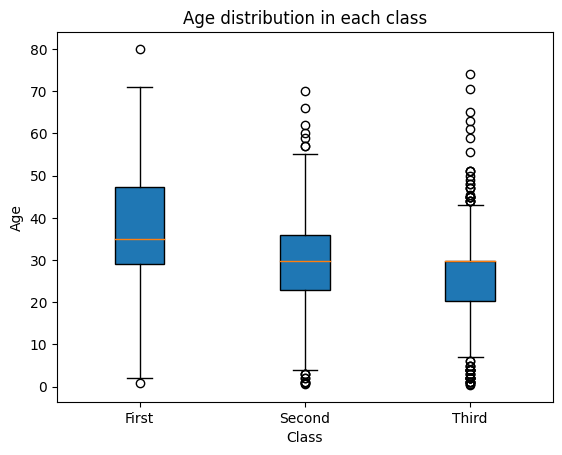

In [152]:
box_plot_data=[sample_1, sample_2, sample_3]
plt.title("Age distribution in each class")
plt.boxplot(box_plot_data, patch_artist=True, labels=['First', 'Second', 'Third'])
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

Average values are nearly equal

In [153]:
print(f'Studying samples for normality:\np_value for first class: {shapiro(sample_1).pvalue},\np_value for second class: {shapiro(sample_2).pvalue},\np_value for third class: {shapiro(sample_3).pvalue}')

Studying samples for normality:
p_value for first class: 0.0024833932984620333,
p_value for second class: 0.0007242765859700739,
p_value for third class: 1.1180403255766844e-13


The null hypothesis that the data comes from a normal distribution must be rejected. Therefore, we must not use T-test

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table of plots.

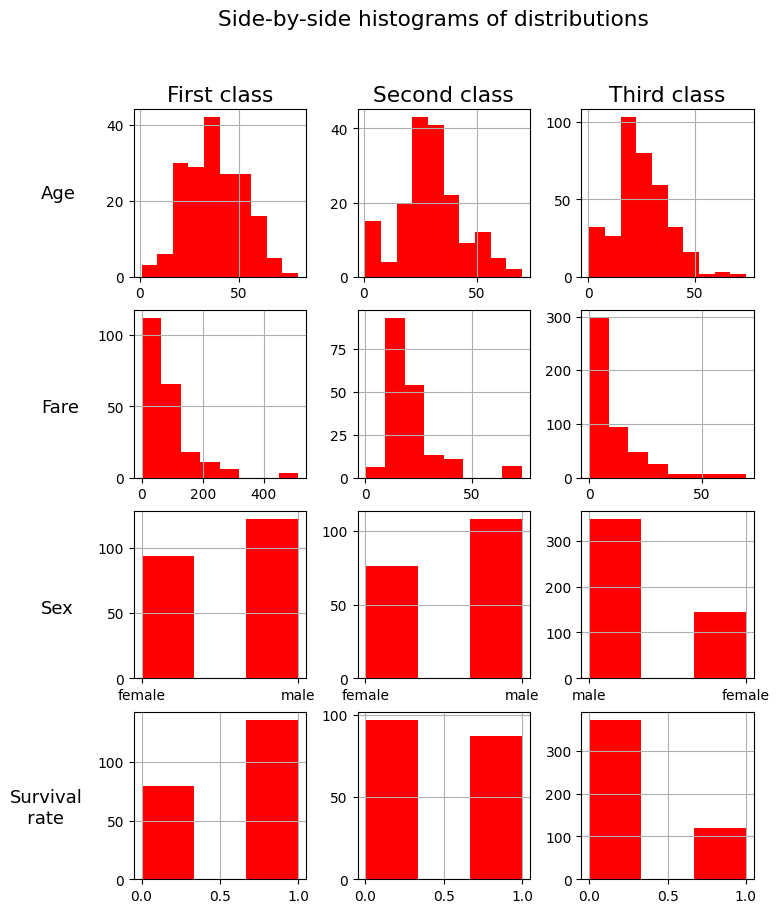

In [154]:
fig, axes = plt.subplots(4, 3, figsize=(8, 10))
plt.rcParams.update({'font.size': 13})
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.text(-3.5, 1590, 'Age')
plt.text(-3.5, 1090, 'Fare')
plt.text(-3.5, 620, 'Sex')
plt.text(-3.7, 130, 'Survival\n   rate')

plt.suptitle('Side-by-side histograms of distributions')
axes[0, 0].hist(db[db['Pclass']==1]['Age'], bins=10, histtype='stepfilled', color='r')
axes[0, 1].hist(db[db['Pclass']==2]['Age'], bins=10, histtype='stepfilled', color='r')
axes[0, 2].hist(db[db['Pclass']==3]['Age'], bins=10, histtype='stepfilled', color='r')
axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()

axes[0, 0].set_title('First class')
axes[0, 1].set_title('Second class')
axes[0, 2].set_title('Third class')

axes[1, 0].hist(db[db['Pclass']==1]['Fare'], bins=8, histtype='stepfilled', color='r')
axes[1, 1].hist(db[db['Pclass']==2]['Fare'], bins=8, histtype='stepfilled', color='r')
axes[1, 2].hist(db[db['Pclass']==3]['Fare'], bins=8, histtype='stepfilled', color='r')
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()

axes[2, 0].hist(db[db['Pclass']==1]['Sex'], bins=3, histtype='stepfilled', color='r')
axes[2, 1].hist(db[db['Pclass']==2]['Sex'], bins=3, histtype='stepfilled', color='r')
axes[2, 2].hist(db[db['Pclass']==3]['Sex'], bins=3, histtype='stepfilled', color='r')
axes[2, 0].grid()
axes[2, 1].grid()
axes[2, 2].grid()

axes[3, 0].hist(db[db['Pclass']==1]['Survived'], bins=3, histtype='stepfilled', color='r')
axes[3, 1].hist(db[db['Pclass']==2]['Survived'], bins=3, histtype='stepfilled', color='r')
axes[3, 2].hist(db[db['Pclass']==3]['Survived'], bins=3, histtype='stepfilled', color='r')
axes[3, 0].grid()
axes[3, 1].grid()
axes[3, 2].grid()
plt.show()

**Task 4. [1 point]**

Find 5 most common **surnames** in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [155]:
db.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [156]:
surnames = db['Name'].apply(lambda x: x.split(',')[0])
data_surnames_count = dict(Counter(surnames).items())
sorted_data_surnames_count = sorted(data_surnames_count.items(), key=lambda item : item[1], reverse=True)
sorted_data_surnames_count

[('Andersson', 9),
 ('Sage', 7),
 ('Johnson', 6),
 ('Panula', 6),
 ('Goodwin', 6),
 ('Skoog', 6),
 ('Carter', 6),
 ('Rice', 5),
 ('Palsson', 4),
 ('Williams', 4),
 ('Asplund', 4),
 ('Fortune', 4),
 ('Harper', 4),
 ('Harris', 4),
 ('Ford', 4),
 ('Gustafsson', 4),
 ('Smith', 4),
 ('Lefebre', 4),
 ('Brown', 4),
 ('Kelly', 4),
 ('Hart', 4),
 ('Baclini', 4),
 ('Moran', 3),
 ('Vander Planke', 3),
 ('Meyer', 3),
 ('Laroche', 3),
 ('West', 3),
 ('Johansson', 3),
 ('Jussila', 3),
 ('Hickman', 3),
 ('Boulos', 3),
 ('Navratil', 3),
 ('Olsen', 3),
 ('Goldsmith', 3),
 ("O'Brien", 3),
 ('Bourke', 3),
 ('Newell', 3),
 ('Hoyt', 3),
 ('Collyer', 3),
 ('Taussig', 3),
 ('Graham', 3),
 ('Allison', 3),
 ('Elias', 3),
 ('Davies', 3),
 ('Richards', 3),
 ('Van Impe', 3),
 ('Flynn', 3),
 ('Thayer', 3),
 ('Hansen', 3),
 ('Jensen', 3),
 ('Braund', 2),
 ('Futrelle', 2),
 ('Allen', 2),
 ('Nasser', 2),
 ('Sandstrom', 2),
 ('Holverson', 2),
 ('Nicola-Yarred', 2),
 ('Turpin', 2),
 ('Arnold-Franchi', 2),
 ('Moubarek',

Five different surnames are found six times

In [157]:
", ".join(dict(sorted_data_surnames_count[:7]).keys())

'Andersson, Sage, Johnson, Panula, Goodwin, Skoog, Carter'

**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

**1.**

In [158]:
db.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

Only in "Age", "Cabin", "Embarked" columns there are empty values. "Age" column is most important

We will lost a lot of information. Therefore result is not plausible

In [159]:
db_2 = db.dropna()
db.shape, db_2.shape

((891, 12), (183, 12))

Because of this we can't see full information in histograms

**2.**

In [160]:
db_3 = db.fillna(0, inplace=False)
db_4 = db.fillna(db['Age'].mean(), inplace=False)
db_5 = db.fillna(db['Age'].median(), inplace=False)
db_6 = db.fillna(round(np.random.uniform(0, 80, 1)[0]))

In [161]:
round(np.random.uniform(0, 80, 1)[0])

18

<Figure size 640x480 with 0 Axes>

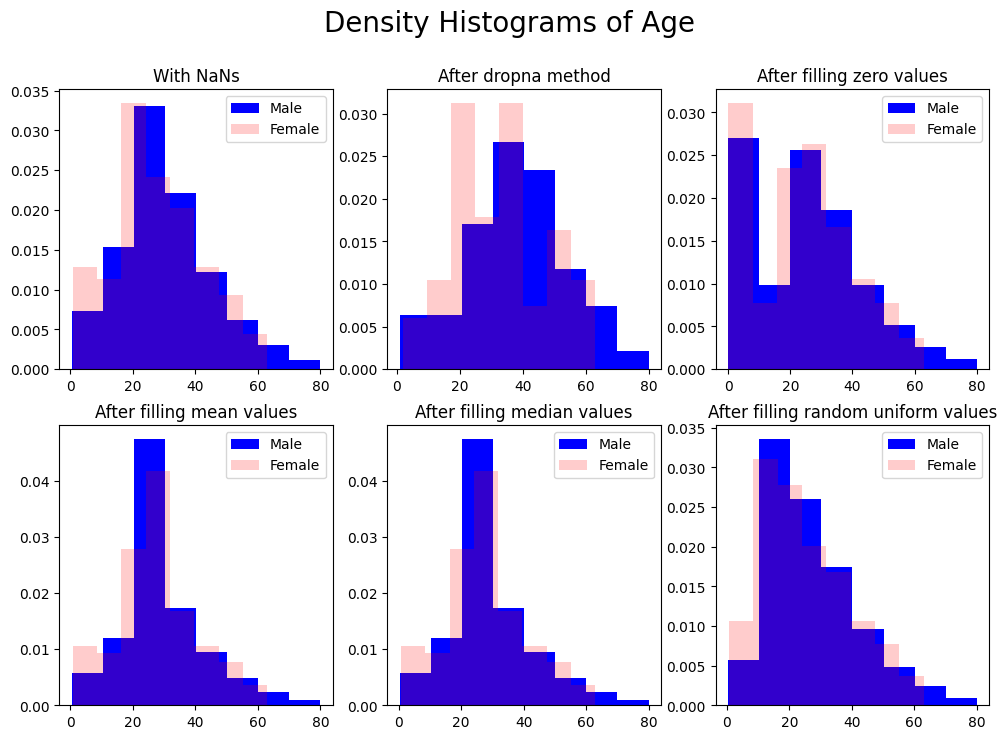

In [162]:
n_bins_age = int(max(db['Age'].values)//10)
plt.rcParams.update({'font.size': 10})
plt.subplots_adjust(wspace=3, hspace=0.5)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.suptitle("Density Histograms оf Age", fontsize=20)

axes[0, 0].hist(db["Age"][db['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[0, 0].hist(db["Age"][db['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[0, 0].set_title("With NaNs")
axes[0, 0].legend()

axes[0, 1].hist(db_2["Age"][db_2['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[0, 1].hist(db_2["Age"][db_2['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[0, 1].set_title("After dropna method")
ax2.legend()

axes[0, 2].hist(db_3["Age"][db_3['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[0, 2].hist(db_3["Age"][db_3['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[0, 2].set_title("After filling zero values")
axes[0, 2].legend()

axes[1, 0].hist(db_4["Age"][db_4['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[1, 0].hist(db_4["Age"][db_4['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[1, 0].set_title("After filling mean values")
axes[1, 0].legend()

axes[1, 1].hist(db_5["Age"][db_5['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[1, 1].hist(db_5["Age"][db_5['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[1, 1].set_title("After filling median values")
axes[1, 1].legend()

axes[1, 2].hist(db_6["Age"][db_6['Sex']=='male'].values, bins=n_bins_age, histtype='stepfilled',color='b',label='Male', density = True)
axes[1, 2].hist(db_6["Age"][db_6['Sex']=='female'].values, alpha=0.2, bins=n_bins_age, histtype='stepfilled',color='r',label='Female', density = True)
axes[1, 2].set_title("After filling random uniform values")
axes[1, 2].legend()

Better options: filling mean values or filling median values

### Great! Don't forget to submit before the deadline :)